In [ ]:
# Import the TensorFlow
import tensorflow as tf
from tensorflow import keras

In [ ]:
# The Fashion MNIST data is available directly in the tf.keras datasets API.
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

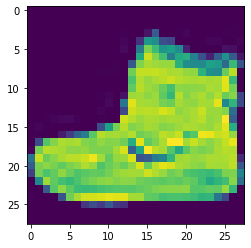

In [ ]:
# Import the matplotlib
import matplotlib.pyplot as plt
# Visualize the image
plt.imshow(training_images[0])
# Print the label and image
print(training_labels[0])
print(training_images[0])

In [ ]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Build the classification model
# Flatten() just takes that square and turns it into a 1 dimensional set.
# Relu() effectively means "If X>0 return X, else return 0" 
# Softmax() takes a set of values, and effectively picks the biggest one.
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# Compile and train the model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4938 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3738 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3362 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3139 - accuracy: 0.8836
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2937 - accuracy: 0.8923


In [ ]:
# Test the model, evaluate the model on unseen data
# model.evaluate input:nummber/label, output:loss/accuracy
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8784


[0.3371765911579132, 0.8784000277519226]

##Exercise 1
For this first exercise, run the following code:
```
classifications = model.predict(test_images)
print(classifications[0])
```
It creates a set of classifications for each of the test images, then prints the first entry in the classifications. The output after you run it is a list of numbers. Why do you think that is and what do those numbers represent?

Try running `print(test_labels[0])` and you'll get a 9. Does that help you understand why the list looks the way it does?

The output of the model is a list of 10 numbers. Those numbers are a probability that the value being classified is the corresponding label. For example, the first value in the list is the probability that the clothing is of class 0 and the next is a 1. Notice that they are all very low probabilities except one. Also, because of `Softmax`, all the probabilities in the list sum to 1.0.

The list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the neural network has predicted that the item it is classifying is most likely an ankle boot.


In [ ]:
# model.predict: input the test data, output the probability of forecast
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[9.7788434e-06 1.0596975e-06 1.6849756e-07 1.9275976e-07 7.8542581e-07
 9.8738191e-04 1.2673048e-05 4.5358341e-02 7.1128656e-05 9.5355839e-01]


In [ ]:
# Answer: model.predict output is a probability, label 9 is represented the ankle boot.
print(test_labels[0])

9


##Exercise 2
Look at the layers in your model. Experiment with different values for the dense layer with 512 neurons.

What different results do you get for loss and training time? Why do you think that's the case?

For example, if you increase to 1,024 neurons, you have to do more calculations, slowing down the process. But in this case they have a good impact because the model is more accurate. That doesn't mean more is always better. You can hit the law of diminishing returns very quickly.

In [ ]:
# Answer: Build the classification model as the dense layer up to 512, observe the epoch take more time (~11s) and got less loss.

import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4733 - accuracy: 0.8310
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3609 - accuracy: 0.8684
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3225 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2991 - accuracy: 0.8890
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[4.3817309e-08 3.1028409e-09 1.3494649e-07 4.0100954e-08 2.1016076e-08
 5.3859097e-03 1.7153388e-07 6.4333081e-02 2.0190926e-08 9.3028057e-01]
9


In [ ]:
# Answer: Build the classification model as the dense layer up to 1024, observe the epoch take more time (~14s) and got less loss.

import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4686 - accuracy: 0.8313
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3571 - accuracy: 0.8691
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3208 - accuracy: 0.8820
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2964 - accuracy: 0.8905
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[1.0908898e-06 5.5915796e-09 1.8165967e-07 1.4065544e-08 1.0887129e-07
 1.0439771e-03 2.6587882e-06 6.7460462e-03 6.0822407e-07 9.9220532e-01]
9


##Exercise 3
What would happen if you remove the `Flatten()` layer. Why do you think that's the case?

In [ ]:
import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

#model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), 
#                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Answer: This version has the 'flatten' removed to see the error. 
# 28 layers of 28 neurons would be infeasible, flatten() used to convert the 28x28 images into a 784x1.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

##Exercise 4
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10?

Try training the network with 5. You get an **error** as soon as it finds an unexpected value. Another rule of thumb—the number of neurons in the last layer should match the number of classes you are classifying for. In this case, it's the digits 0 through 9, so there are 10 of them, and hence you should have 10 neurons in your final layer.

In [ ]:
import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

#model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), 
#                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Answer: This version try training the network with 5 to see the error.
# 5 is not match 10 class number, the number of neurons in the last layer should match class number [0-9].
model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

##Exercise 5
Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10?

There isn't a significant impact because this is relatively simple data. For far more complex data, extra layers are often necessary.

In [ ]:
import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# Answer: insert a layer with 256 into the model.
# There isn't a significant impact because this is simple data. For far more complex data, extra layers are often necessary.
model = tf.keras.models.Sequential([ tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 19s 9ms/step - loss: 0.4702 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3537 - accuracy: 0.8686
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3189 - accuracy: 0.8822
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2944 - accuracy: 0.8902
Epoch 5/5
313/313 [==============================] - 2s 6ms/step
[3.3265547e-05 1.3203154e-05 3.7205580e-05 8.3159985e-06 3.5471458e-05
 2.4256270e-01 1.7910069e-04 1.0017045e-01 1.0543491e-05 6.5694970e-01]
9


##Exercise 6
Before you trained, you normalized the data, going from values that were 0 through 255 to values that were 0 through 1. What would be the impact of removing that? Here's the complete code to give it a try (note that the two lines that normalize the data are commented out).

Why do you think you get different results? There's a great answer here on Stack Overflow.
```
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])
```





In [ ]:
# Answer: per the below result
# Within normalized: faster (~5s) and accuracy.
# Without normalized: Slow (>10s) and less accuracy.
# A good answer from Stack Overflow as below:
# Does Normalization always increase the accuracy? Apparently, No. 
# It is not necessary that normalization always increases accuracy. It may or might not, you never really know until you implement. 
# Again it depends on at which stage in you training you apply normalization, on whether you apply normalization after every activation, etc.
# As the range of the values of the features gets narrowed down to a particular range because of normalization, its easy to perform computations over a smaller range of values. So, usually the model gets trained a bit faster.


import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0
# test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.9.2
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 3.8203
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5441
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5119
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4913
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[1.4328530e-16 1.7915660e-17 2.5715820e-32 1.2075188e-11 8.7651459e-23
 4.7165412e-03 2.1578449e-17 1.2865686e-01 7.3142867e-11 8.6662656e-01]
9
